In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
tsunami_Sources = pd.read_csv('../input/sources.csv', sep=",", header=0, index_col=0)
tsunami_Sources.head(10)

,YEAR,MONTH,DAY,HOUR,MINUTE,CAUSE,VALIDITY,FOCAL_DEPTH,PRIMARY_MAGNITUDE,REGION_CODE,...,ALL_INJURIES,INJURY_TOTAL,ALL_FATALITIES,FATALITY_TOTAL,ALL_DAMAGE_MILLIONS,DAMAGE_TOTAL,ALL_HOUSES_DAMAGED,HOUSE_DAMAGE_TOTAL,ALL_HOUSES_DESTROYED,HOUSE_DESTRUCTION_TOTAL
SOURCE_ID,,,,,,,,,,,,,,,,,,,,,
1,-2000,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,50.0,...,NaN,NaN,NaN,3.0,NaN,4.0,NaN,NaN,NaN,NaN
3,-1610,NaN,NaN,NaN,NaN,6.0,4.0,NaN,NaN,50.0,...,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN,NaN,NaN
4,-1365,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,50.0,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
5,-1300,NaN,NaN,NaN,NaN,0.0,2.0,NaN,6.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-760,NaN,NaN,NaN,NaN,0.0,2.0,NaN,NaN,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,-590,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,-525,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3469,-480,9.0,29.0,NaN,NaN,1.0,1.0,NaN,NaN,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,-479,NaN,NaN,NaN,NaN,1.0,2.0,NaN,7.0,50.0,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
tsunami_Sources.shape

(2582, 44)

In [4]:
#null_cols = tsunami_Sources.isnull().sum()
#null_cols[null_cols > 0]

In [5]:
#tsunami_Sources.columns

In [6]:
tsunami_Sources = tsunami_Sources.drop(['HOUR','MINUTE','FOCAL_DEPTH','STATE/PROVINCE','MAGNITUDE_ABE',
                                        'MAGNITUDE_IIDA','WARNING_STATUS','MISSING','MISSING_ESTIMATE','INJURIES',
                                        'INJURY_ESTIMATE','DAMAGE_MILLIONS_DOLLARS','HOUSES_DAMAGED','HOUSE_DAMAGE_ESTIMATE',
                                        'HOUSES_DESTROYED','HOUSE_DAMAGE_ESTIMATE','ALL_MISSING','MISSING_TOTAL','ALL_INJURIES',
                                        'INJURY_TOTAL','ALL_HOUSES_DAMAGED','HOUSE_DAMAGE_TOTAL','ALL_HOUSES_DESTROYED',
                                        'HOUSE_DESTRUCTION_TOTAL'], 1)

tsunami_Sources

,YEAR,MONTH,DAY,CAUSE,VALIDITY,PRIMARY_MAGNITUDE,REGION_CODE,COUNTRY,LOCATION,LATITUDE,...,MAXIMUM_HEIGHT,INTENSITY_SOLOVIEV,FATALITIES,FATALITY_ESTIMATE,DAMAGE_ESTIMATE,HOUSE_DESTRUCTION_ESTIMATE,ALL_FATALITIES,FATALITY_TOTAL,ALL_DAMAGE_MILLIONS,DAMAGE_TOTAL
SOURCE_ID,,,,,,,,,,,,,,,,,,,,,
1,-2000,NaN,NaN,1.0,1.0,NaN,50.0,SYRIA,SYRIAN COASTS,35.683,...,NaN,6.0,NaN,3.0,4.0,NaN,NaN,3.0,NaN,4.0
3,-1610,NaN,NaN,6.0,4.0,NaN,50.0,GREECE,THERA ISLAND (SANTORINI),36.400,...,90.00,6.0,NaN,3.0,3.0,NaN,NaN,3.0,NaN,3.0
4,-1365,NaN,NaN,1.0,1.0,NaN,50.0,SYRIA,SYRIAN COASTS,35.683,...,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
5,-1300,NaN,NaN,0.0,2.0,6.0,50.0,TURKEY,"IONIAN COASTS, TROAD",39.960,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-760,NaN,NaN,0.0,2.0,NaN,50.0,ISRAEL,ISRAEL AND LEBANON COASTS,NaN,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,-590,NaN,NaN,1.0,2.0,NaN,50.0,LEBANON,LEBANON COASTS,33.270,...,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,-525,NaN,NaN,1.0,2.0,NaN,50.0,LEBANON,LEBANON COASTS,33.560,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3469,-480,9.0,29.0,1.0,1.0,NaN,50.0,GREECE,SARONIC GULF,37.900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,-479,NaN,NaN,1.0,2.0,7.0,50.0,GREECE,NORTH AEGEAN,39.700,...,NaN,3.0,NaN,3.0,NaN,NaN,NaN,3.0,NaN,NaN


In [7]:
#print(tsunami_Sources['REGION_CODE'] == 50.0)
#mar_mediterraneo = []
#[mar_mediterraneo.append(code) for code in tsunami_Sources['REGION_CODE'] if code == 50.0]
#print(mar_mediterraneo)
#len(mar_mediterraneo)

In [8]:
#https://www.ngdc.noaa.gov/nndc/DescribeField.jsp?dataset=101650&search_look=77&field_name=tsevent_vsqp.REGION_CODE --> codigos por regiones
#https://www.ngdc.noaa.gov/nndc/DescribeField.jsp?dataset=101650&search_look=77&field_name=tsevent_vsqp.CAUSE_CODE --> codigo por causa

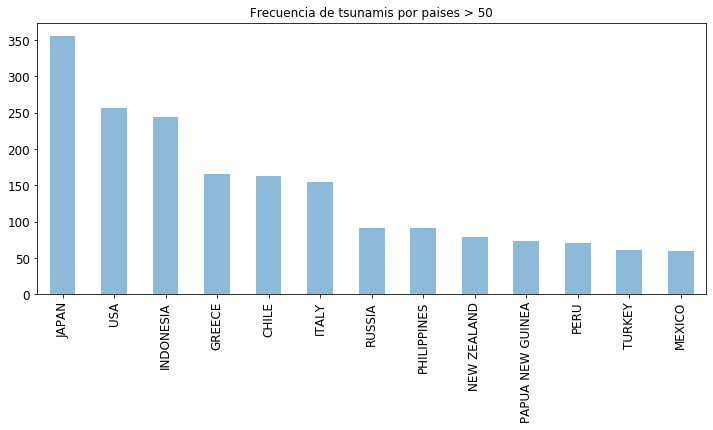

In [9]:
tsunami_Sources['COUNTRY_FRECUENCY'] = tsunami_Sources.groupby(tsunami_Sources.COUNTRY)['COUNTRY'].transform('count')
tsunami_Sources.COUNTRY[tsunami_Sources.COUNTRY_FRECUENCY > 50].value_counts().plot(kind='bar', legend=False, figsize=(12,5), 
                                            title="Frecuencia de tsunamis por paises > 50", fontsize=12, alpha=0.5); 

In [10]:
#Year = []
#[Year.append(i) for i in tsunami_Sources['YEAR'] if i > 2000]

#print(Year)
#print(len(Year))

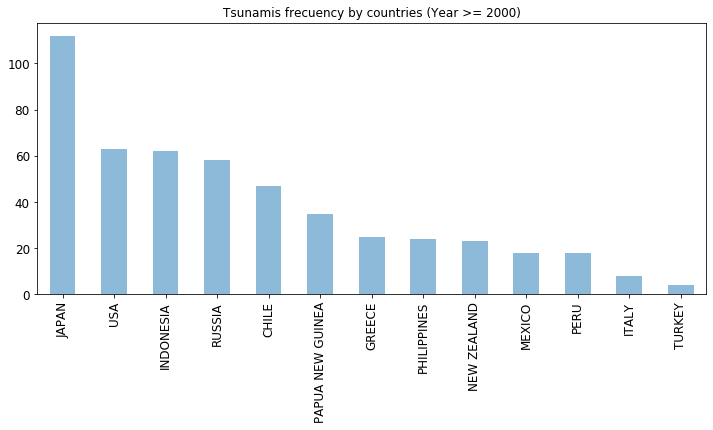

In [11]:
tsunami_Sources.COUNTRY[(tsunami_Sources.YEAR >= 1950) & (tsunami_Sources.COUNTRY_FRECUENCY > 50)].value_counts().plot(kind='bar',
                legend=False, figsize=(12,5), title="Tsunamis frecuency by countries (Year >= 2000)", fontsize=12, alpha=0.5); 

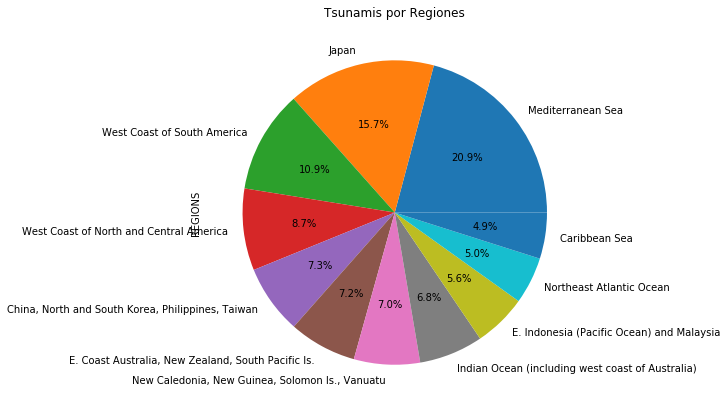

In [21]:
regions = {77:'Costa Oeste de Africa', 78:'Central Africa', 73:'Northeast Atlantic Ocean', 72:'Northwest Atlantic Ocean',
           70:'Southeast Atlantic Ocean', 71:'Southwest Atlantic Ocean', 75:'E. Coast USA and Canada, St Pierre and Miquelon',
           76:'Gulf of Mexico', 74:'Caribbean Sea', 40:'Black Sea and Caspian Sea', 50:'Mediterranean Sea', 30:'Red Sea and Persian Gulf',
           60:'Indian Ocean (including west coast of Australia)', 87:'Alaska (including Aleutian Islands)',
           84:'China, North and South Korea, Philippines, Taiwan', 81:'E. Coast Australia, New Zealand, South Pacific Is.', 
           80:'Hawaii, Johnston Atoll, Midway I', 83:'E. Indonesia (Pacific Ocean) and Malaysia', 
           82:'New Caledonia, New Guinea, Solomon Is., Vanuatu', 86:'Kamchatka and Kuril Islands', 85:'Japan',
           88:'West Coast of North and Central America', 89:'West Coast of South America'}

tsunami_Sources['REGIONS'] = tsunami_Sources['REGION_CODE'].map(regions)

#Group by Regions
tsunami_Sources['REGIONS_FRECUENCY'] = tsunami_Sources.groupby(tsunami_Sources.REGIONS)['REGIONS'].transform('count')
#Frecuency by Regions
tsunami_Sources.REGIONS[tsunami_Sources.REGIONS_FRECUENCY > 100].value_counts().plot(kind='pie', legend=False, figsize=(8,7),
                                                            title="Tsunamis por Regiones", autopct='%.1f%%')           
                                              
                                              
                                              
                                                      
    


In [ ]:
tsunami_Sources['REGIONS_FRECUENCY']


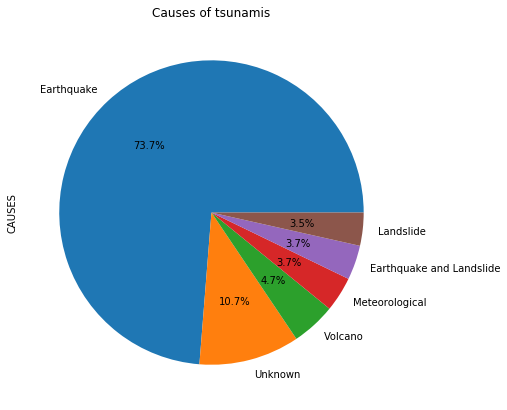

In [13]:
causes = {0:'Unknown', 1:'Earthquake', 2:'Questionable Earthquake', 3:'Earthquake and Landslide', 4:'Volcano and Earthquake',
          5:'Volcano, Earthquake, and Landslide', 6:'Volcano', 7:'Volcano and Landslide', 8:'Landslide', 9:'Meteorological',
          10:'Explosion', 11:'Astronomical Tide'}
          
tsunami_Sources['CAUSES'] = tsunami_Sources['CAUSE'].map(causes)


tsunami_Sources['CAUSES_FRECUENCY'] = tsunami_Sources.groupby(tsunami_Sources.CAUSES)['CAUSES'].transform('count')#grupo por causas
tsunami_Sources.CAUSES[tsunami_Sources.CAUSES_FRECUENCY >= 50].value_counts().plot(kind='pie', legend=False, figsize=(8,7),
                                                            title="Causes of tsunamis", autopct='%.1f%%'); # causa del tsunami
                                            
                                            
                                            
                                            

In [ ]:
tsunami = pd.read_csv('../input/waves.csv', sep=",", header=0, index_col=0)
tsunami.head(20)

In [ ]:
tsunami.shape

In [ ]:
#null_cols = tsunami.isnull().sum()
#null_cols[null_cols > 0]

In [ ]:
tsunami = tsunami.drop(['TRAVEL_TIME_HOURS','TRAVEL_TIME_MINUTES','VALIDITY','FIRST_MOTION','INJURIES',
                       'INJURY_ESTIMATE','FATALITIES','FATALITY_ESTIMATE','DAMAGE_MILLIONS_DOLLARS',
                       'DAMAGE_ESTIMATE','HOUSES_DAMAGED','HOUSE_DAMAGE_ESTIMATE','HOUSES_DESTROYED',
                       'HOUSE_DAMAGE_ESTIMATE'], 1)


In [ ]:
tsunami.shape

In [ ]:
tsunami.head(10)

In [ ]:
#list(tsunami.columns)

In [ ]:
#list(tsunami_Sources.columns)

In [ ]:
tsunami_stat = pd.merge(tsunami_Sources, tsunami, on=['YEAR','MONTH','DAY','REGION_CODE','COUNTRY','LOCATION','LATITUDE',
                                                      'LONGITUDE','MAXIMUM_HEIGHT','HOUSE_DESTRUCTION_ESTIMATE'])
tsunami_stat.head(50)                                      

In [ ]:
tsunami_stat.shape